# Convolutional Neural Networks: Application on smile data house database and SIGNS dataset

The target of this project is to
- Build and train a ConvNet in TensorFlow for a __binary__ classification on smile data house database.
- Build and train a ConvNet in TensorFlow for a __multiclass__ classification problem using SIGNS dataset.



## 1 - Packages

loading the packages.

In [ ]:
### v1.1

In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

<a name='1-1'></a>
### 1.1 - Load the Data and Split the Data into Train/Test Sets



In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


display the images contained in the dataset. Images are **64x64** pixels in RGB format (3 channels).

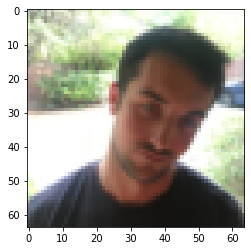

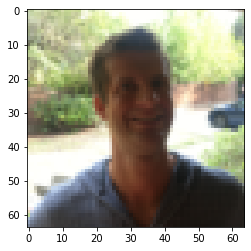

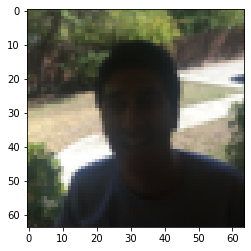

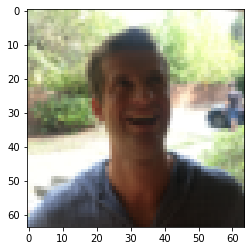

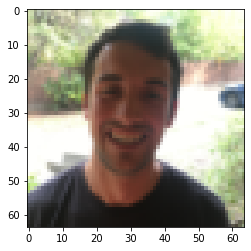

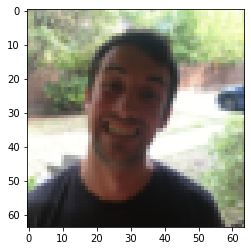

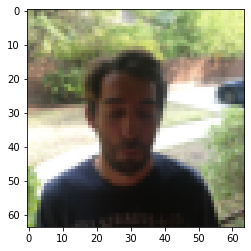

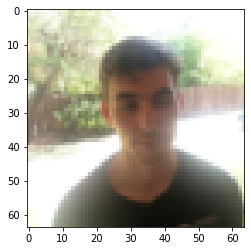

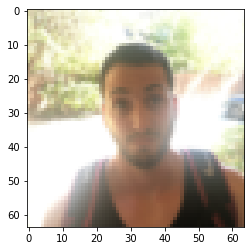

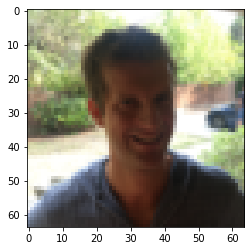

In [ ]:
for index in range(10):

    plt.imshow(X_train_orig[index]) #display sample training image
    plt.show()

<a name='3-1'></a>
### 3.1 - Create the Sequential Model

### Exercise 1 - happyModel


In [ ]:
#  happyModel

def happyModel():
    """

    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """
    model =  tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
            ## Conv2D with 32 7x7 filters and stride of 1
            tfl.Conv2D(32, (7,7)),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis=-1),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D with default parameters
            tfl.MaxPool2D(),
            ## Flatten layer
            tfl.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tfl.Dense(1, activation='sigmoid')
        ])


    return model

In [ ]:
happy_model = happyModel()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)

output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]

comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


In [ ]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
happy_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

<a name='3-2'></a>
### 3.2 - Train and Evaluate the Model


In [ ]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 4s 95ms/step - loss: 0.8834 - accuracy: 0.7550
Epoch 2/10
38/38 [==============================] - 4s 95ms/step - loss: 0.2878 - accuracy: 0.8700
Epoch 3/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1452 - accuracy: 0.9533
Epoch 4/10
38/38 [==============================] - 4s 92ms/step - loss: 0.0992 - accuracy: 0.9683
Epoch 5/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0959 - accuracy: 0.9600
Epoch 6/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1155 - accuracy: 0.9567
Epoch 7/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1271 - accuracy: 0.9517
Epoch 8/10
38/38 [==============================] - 4s 95ms/step - loss: 0.1359 - accuracy: 0.9517
Epoch 9/10
38/38 [==============================] - 4s 97ms/step - loss: 0.0868 - accuracy: 0.9800
Epoch 10/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0703 - accuracy: 0.9800


In [ ]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 33ms/step - loss: 0.1523 - accuracy: 0.9467


[0.1522531658411026, 0.9466666579246521]

<a name='4'></a>
## 4 - CNN using SIGNS datasets

<a name='4-1'></a>
### 4.1 - Load the SIGNS Dataset

As a reminder, the SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5.

In [ ]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


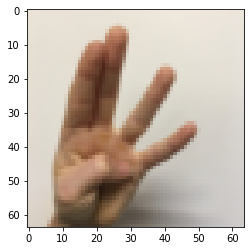

In [ ]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

<a name='4-2'></a>
### 4.2 - Split the Data into Train/Test Sets


In [ ]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [ ]:
# convolutional_model

def convolutional_model(input_shape):
    """

    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """

    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv2D(8,4,activation='linear',strides=1,padding='same')(input_img)
    A1=tfl.ReLU()(Z1)
    P1=tfl.MaxPool2D(pool_size=(8, 8), strides=(8,8), padding='same')(A1)
    Z2=  tfl.Conv2D(16, 2, activation='linear', padding="same", strides=1)(P1)
    A2=tfl.ReLU()(Z2)
    P2= tfl.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    F=tfl.Flatten()(P2)
    outputs=tfl.Dense(6, activation='softmax')(F)
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]

comparator(summary(conv_model), output)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_3 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 16)         

In [ ]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]

comparator(summary(conv_model), output)

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_7 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 16)         


### 4.4 - Train the Model

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 112ms/step - loss: 1.8350 - accuracy: 0.1611 - val_loss: 1.7973 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7937 - accuracy: 0.1648 - val_loss: 1.7932 - val_accuracy: 0.0750
Epoch 3/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7895 - accuracy: 0.1574 - val_loss: 1.7904 - val_accuracy: 0.1750
Epoch 4/100
17/17 [==============================] - 2s 108ms/step - loss: 1.7859 - accuracy: 0.1565 - val_loss: 1.7880 - val_accuracy: 0.1167
Epoch 5/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7822 - accuracy: 0.2556 - val_loss: 1.7842 - val_accuracy: 0.2333
Epoch 6/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7774 - accuracy: 0.2898 - val_loss: 1.7796 - val_accuracy: 0.2667
Epoch 7/100
17/17 [==============================] - 2s 107ms/step - loss: 1.7719 - accuracy: 0.2880 - val_loss: 1.7767 - val_accuracy: 0.2417

<a name='5'></a>
## 5 - History Object

The history object is an output of the `.fit()` operation, and provides a record of all the loss and metric values in memory. It's stored as a dictionary that you can retrieve at `history.history`:

In [ ]:
history.history

{'loss': [1.7978758811950684,
  1.7865252494812012,
  1.7764029502868652,
  1.7693036794662476,
  1.7617474794387817,
  1.7530288696289062,
  1.7425014972686768,
  1.730315923690796,
  1.7157639265060425,
  1.6983810663223267,
  1.6767816543579102,
  1.6516985893249512,
  1.6224603652954102,
  1.589823842048645,
  1.5536115169525146,
  1.5135859251022339,
  1.4710888862609863,
  1.4278708696365356,
  1.3848121166229248,
  1.338848352432251,
  1.2968913316726685,
  1.2541699409484863,
  1.211746096611023,
  1.1707077026367188,
  1.1308059692382812,
  1.0953470468521118,
  1.062779426574707,
  1.0315124988555908,
  1.0000252723693848,
  0.9706546068191528,
  0.9442508816719055,
  0.9179074168205261,
  0.8947268724441528,
  0.8726999759674072,
  0.8520665764808655,
  0.8331469893455505,
  0.814520001411438,
  0.7966623306274414,
  0.7791953086853027,
  0.7632995843887329,
  0.7486632466316223,
  0.7340409159660339,
  0.7196915149688721,
  0.7062404155731201,
  0.693324625492096,
  0.68089

Now visualize the loss over time using `history.history`:

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

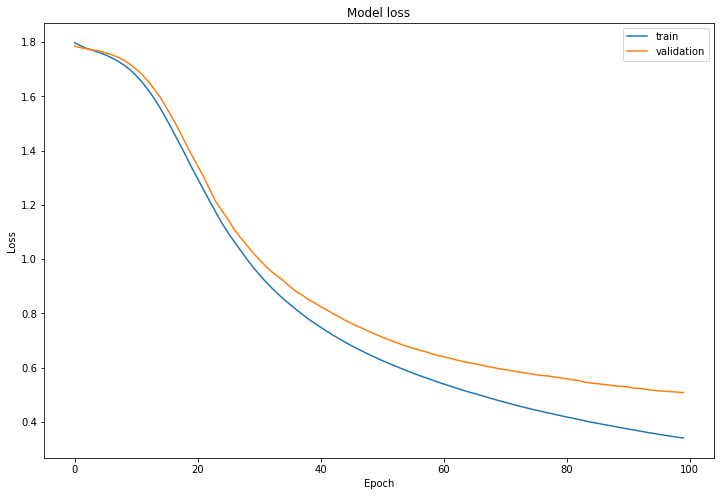

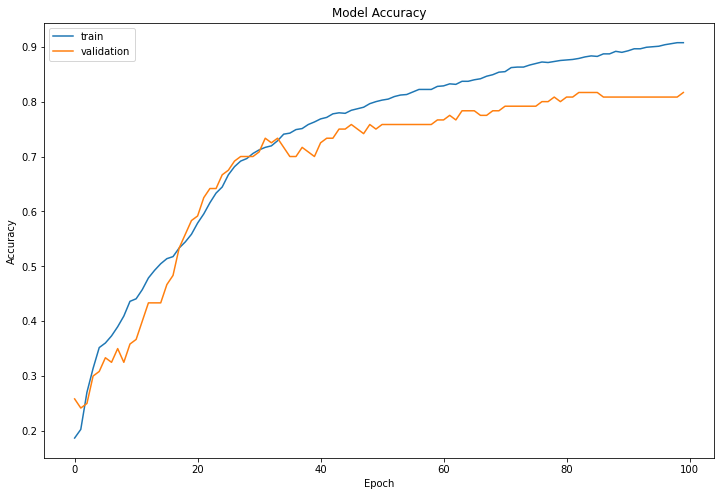

In [ ]:

df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')